
### This notebook outlines the process of data exploration and prediction using an LSTM model
  

In [159]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
# use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential

from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping

import itertools
from keras.layers import LSTM

from keras.layers import Dropout


# Importing the data and data processing

In [ ]:


df = pd.read_csv('weather.csv')
df

,Unnamed: 0,name,id,address,date,GHI,latitude,longitude,time,surface_pressure,...,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,elevation,timezone,sunrise,sunset
0,0,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 10:45:00,0.970,51.10499,-114.250011,2017-11-21 10:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 11:45:00,23.927,51.10499,-114.250011,2017-11-21 11:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 12:45:00,69.659,51.10499,-114.250011,2017-11-21 12:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 13:45:00,59.172,51.10499,-114.250011,2017-11-21 13:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 14:45:00,18.061,51.10499,-114.250011,2017-11-21 14:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24864,24864,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2023-03-16 15:00:00,182.748,51.10499,-114.250011,2023-03-16 15:00:00,898.5,...,315.0,40.0,8.1,3.5,0.0,0.0,1088.0,MDT,2023-03-16T07:47,2023-03-16T19:42
24865,24865,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2023-03-16 16:00:00,152.644,51.10499,-114.250011,2023-03-16 16:00:00,898.1,...,308.0,37.0,8.9,4.0,0.0,7.0,1088.0,MDT,2023-03-16T07:47,2023-03-16T19:42
24866,24866,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2023-03-16 17:00:00,100.145,51.10499,-114.250011,2023-03-16 17:00:00,897.8,...,297.0,41.0,8.9,3.5,0.0,0.0,1088.0,MDT,2023-03-16T07:47,2023-03-16T19:42
24867,24867,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2023-03-16 18:00:00,40.493,51.10499,-114.250011,2023-03-16 18:00:00,898.7,...,148.0,65.0,7.4,6.8,0.0,2.0,1088.0,MDT,2023-03-16T07:47,2023-03-16T19:42


###  Note that data include 'nan' . I converted both to numpy nan in importing stage (above) and treated both of them the same. 



In [193]:
df.head() 

,Unnamed: 0,name,id,address,date,GHI,latitude,longitude,time,surface_pressure,...,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,elevation,timezone,sunrise,sunset
0,0,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 10:45:00,0.970,51.10499,-114.250011,2017-11-21 10:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 11:45:00,23.927,51.10499,-114.250011,2017-11-21 11:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 12:45:00,69.659,51.10499,-114.250011,2017-11-21 12:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 13:45:00,59.172,51.10499,-114.250011,2017-11-21 13:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,2017-11-21 14:45:00,18.061,51.10499,-114.250011,2017-11-21 14:45:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24869 entries, 0 to 24868
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           24869 non-null  int64  
 1   name                 24869 non-null  object 
 2   id                   24869 non-null  int64  
 3   address              24869 non-null  object 
 4   date                 24869 non-null  object 
 5   GHI                  24869 non-null  float64
 6   latitude             24869 non-null  float64
 7   longitude            24869 non-null  float64
 8   time                 24869 non-null  object 
 9   surface_pressure     24533 non-null  float64
 10  snowfall             24533 non-null  float64
 11  temperature_2m       24533 non-null  float64
 12  winddirection_10m    24533 non-null  float64
 13  relativehumidity_2m  24533 non-null  float64
 14  windgusts_10m        24533 non-null  float64
 15  windspeed_10m        24533 non-null 

In [195]:
df.shape

(24869, 22)

In [196]:
df.describe()

,Unnamed: 0,id,GHI,latitude,longitude,surface_pressure,snowfall,temperature_2m,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,elevation
count,24869.000000,24869.0,24869.000000,24869.00000,2.486900e+04,24533.000000,24533.00000,24533.000000,24533.000000,24533.000000,24533.000000,24533.000000,24533.000000,24533.000000,24533.0
mean,12434.000000,577650.0,123.955028,51.10499,-1.142500e+02,889.788090,0.00953,44.476159,217.647006,57.719969,15.323095,6.488452,0.058872,43.129703,1088.0
std,7179.206258,0.0,138.925005,0.00000,2.842228e-14,6.946267,0.05431,21.595540,99.618130,20.782527,6.640409,3.390723,0.297652,36.893743,0.0
min,0.000000,577650.0,0.001000,51.10499,-1.142500e+02,858.900000,0.00000,-35.500000,1.000000,7.000000,1.600000,0.000000,0.000000,0.000000,1088.0
25%,6217.000000,577650.0,9.403000,51.10499,-1.142500e+02,885.400000,0.00000,30.800000,133.000000,41.000000,10.500000,4.000000,0.000000,8.000000,1088.0
50%,12434.000000,577650.0,61.664000,51.10499,-1.142500e+02,890.300000,0.00000,46.200000,260.000000,58.000000,14.300000,6.000000,0.000000,32.000000,1088.0
75%,18651.000000,577650.0,211.614000,51.10499,-1.142500e+02,894.600000,0.00000,60.700000,298.000000,74.000000,19.000000,8.400000,0.000000,82.000000,1088.0
max,24868.000000,577650.0,514.462000,51.10499,-1.142500e+02,912.200000,1.47000,98.600000,360.000000,100.000000,49.400000,24.900000,9.100000,100.000000,1088.0


In [197]:
df.columns

Index(['Unnamed: 0', 'name', 'id', 'address', 'date', 'GHI', 'latitude',
       'longitude', 'time', 'surface_pressure', 'snowfall', 'temperature_2m',
       'winddirection_10m', 'relativehumidity_2m', 'windgusts_10m',
       'windspeed_10m', 'precipitation', 'cloudcover', 'elevation', 'timezone',
       'sunrise', 'sunset'],
      dtype='object')

#  Dealing with missing values  'nan' with a test statistic

In [198]:
df.isnull().mean()*100

Unnamed: 0             0.00000
name                   0.00000
id                     0.00000
address                0.00000
date                   0.00000
GHI                    0.00000
latitude               0.00000
longitude              0.00000
time                   0.00000
surface_pressure       1.35108
snowfall               1.35108
temperature_2m         1.35108
winddirection_10m      1.35108
relativehumidity_2m    1.35108
windgusts_10m          1.35108
windspeed_10m          1.35108
precipitation          1.35108
cloudcover             1.35108
elevation              1.35108
timezone               1.35108
sunrise                1.35108
sunset                 1.35108
dtype: float64

### We can see that the percentage of missing values in the whole data is very small, so here the processing method of directly deleting the rows with missing values is used

In [199]:
df = df.dropna()


In [200]:
df.isnull().mean()*100

Unnamed: 0             0.0
name                   0.0
id                     0.0
address                0.0
date                   0.0
GHI                    0.0
latitude               0.0
longitude              0.0
time                   0.0
surface_pressure       0.0
snowfall               0.0
temperature_2m         0.0
winddirection_10m      0.0
relativehumidity_2m    0.0
windgusts_10m          0.0
windspeed_10m          0.0
precipitation          0.0
cloudcover             0.0
elevation              0.0
timezone               0.0
sunrise                0.0
sunset                 0.0
dtype: float64

In [202]:
# Convert 'time' column to datetime and set it as the index
df['datetime'] = pd.to_datetime(df['time'])
df.set_index('datetime', inplace=True)

# Drop unnecessary columns
df.drop(columns=['date', 'time'], inplace=True)

# Display the dataframe
print(df.head())

print(df.head())

                     Unnamed: 0                            name      id  \
datetime                                                                  
2017-11-22 09:00:00           6  Bearspaw Water Treatment Plant  577650   
2017-11-22 10:00:00           8  Bearspaw Water Treatment Plant  577650   
2017-11-22 11:00:00          10  Bearspaw Water Treatment Plant  577650   
2017-11-22 12:00:00          12  Bearspaw Water Treatment Plant  577650   
2017-11-22 13:00:00          14  Bearspaw Water Treatment Plant  577650   

                                      address      GHI  latitude   longitude  \
datetime                                                                       
2017-11-22 09:00:00  11444 Bearspaw Dam RD NW   20.961  51.10499 -114.250011   
2017-11-22 10:00:00  11444 Bearspaw Dam RD NW   50.230  51.10499 -114.250011   
2017-11-22 11:00:00  11444 Bearspaw Dam RD NW  236.600  51.10499 -114.250011   
2017-11-22 12:00:00  11444 Bearspaw Dam RD NW  399.535  51.10499 -114.2500

/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_18150/4152773427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['time'])
/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_18150/4152773427.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['date', 'time'], inplace=True)


In [203]:
df

,Unnamed: 0,name,id,address,GHI,latitude,longitude,surface_pressure,snowfall,temperature_2m,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,elevation,timezone,sunrise,sunset
datetime,,,,,,,,,,,,,,,,,,,,
2017-11-22 09:00:00,6,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,20.961,51.10499,-114.250011,884.2,0.0,40.8,274.0,71.0,19.9,6.5,0.0,0.0,1088.0,MDT,2017-11-22T09:05,2017-11-22T17:40
2017-11-22 10:00:00,8,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,50.230,51.10499,-114.250011,883.8,0.0,31.9,201.0,89.0,11.9,3.1,0.0,0.0,1088.0,MDT,2017-11-22T09:05,2017-11-22T17:40
2017-11-22 11:00:00,10,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,236.600,51.10499,-114.250011,884.3,0.0,33.7,173.0,87.0,8.9,3.6,0.0,3.0,1088.0,MDT,2017-11-22T09:05,2017-11-22T17:40
2017-11-22 12:00:00,12,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,399.535,51.10499,-114.250011,884.3,0.0,36.5,124.0,84.0,8.3,4.0,0.0,2.0,1088.0,MDT,2017-11-22T09:05,2017-11-22T17:40
2017-11-22 13:00:00,14,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,398.994,51.10499,-114.250011,884.4,0.0,38.3,118.0,80.0,7.6,4.3,0.0,2.0,1088.0,MDT,2017-11-22T09:05,2017-11-22T17:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-16 15:00:00,24864,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,182.748,51.10499,-114.250011,898.5,0.0,36.2,315.0,40.0,8.1,3.5,0.0,0.0,1088.0,MDT,2023-03-16T07:47,2023-03-16T19:42
2023-03-16 16:00:00,24865,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,152.644,51.10499,-114.250011,898.1,0.0,37.2,308.0,37.0,8.9,4.0,0.0,7.0,1088.0,MDT,2023-03-16T07:47,2023-03-16T19:42
2023-03-16 17:00:00,24866,Bearspaw Water Treatment Plant,577650,11444 Bearspaw Dam RD NW,100.145,51.10499,-114.250011,897.8,0.0,36.7,297.0,41.0,8.9,3.5,0.0,0.0,1088.0,MDT,2023-03-16T07:47,2023-03-16T19:42


In [205]:
print(df.dtypes)



Unnamed: 0               int64
name                    object
id                       int64
address                 object
GHI                    float64
latitude               float64
longitude              float64
surface_pressure       float64
snowfall               float64
temperature_2m         float64
winddirection_10m      float64
relativehumidity_2m    float64
windgusts_10m          float64
windspeed_10m          float64
precipitation          float64
cloudcover             float64
elevation              float64
timezone                object
sunrise                 object
sunset                  object
dtype: object


In [206]:
df['sunset'] = pd.to_datetime(df['sunset']) 
df['sunrise'] = pd.to_datetime(df['sunrise']) 
print(df.dtypes)

Unnamed: 0                      int64
name                           object
id                              int64
address                        object
GHI                           float64
latitude                      float64
longitude                     float64
surface_pressure              float64
snowfall                      float64
temperature_2m                float64
winddirection_10m             float64
relativehumidity_2m           float64
windgusts_10m                 float64
windspeed_10m                 float64
precipitation                 float64
cloudcover                    float64
elevation                     float64
timezone                       object
sunrise                datetime64[ns]
sunset                 datetime64[ns]
dtype: object


/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_18150/4020499986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sunset'] = pd.to_datetime(df['sunset'])
/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_18150/4020499986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sunrise'] = pd.to_datetime(df['sunrise'])


In [ ]:
#Remove features that are not useful for prediction

columns_to_drop = ['Unnamed: 0', 'id', 'latitude', 'longitude', 'elevation', 'name', 'address', 'timezone']
df_clean = df.drop(columns=columns_to_drop)

In [212]:
df_clean

,GHI,surface_pressure,snowfall,temperature_2m,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,sunrise,sunset
datetime,,,,,,,,,,,,
2017-11-22 09:00:00,20.961,884.2,0.0,40.8,274.0,71.0,19.9,6.5,0.0,0.0,2017-11-22 09:05:00,2017-11-22 17:40:00
2017-11-22 10:00:00,50.230,883.8,0.0,31.9,201.0,89.0,11.9,3.1,0.0,0.0,2017-11-22 09:05:00,2017-11-22 17:40:00
2017-11-22 11:00:00,236.600,884.3,0.0,33.7,173.0,87.0,8.9,3.6,0.0,3.0,2017-11-22 09:05:00,2017-11-22 17:40:00
2017-11-22 12:00:00,399.535,884.3,0.0,36.5,124.0,84.0,8.3,4.0,0.0,2.0,2017-11-22 09:05:00,2017-11-22 17:40:00
2017-11-22 13:00:00,398.994,884.4,0.0,38.3,118.0,80.0,7.6,4.3,0.0,2.0,2017-11-22 09:05:00,2017-11-22 17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-16 15:00:00,182.748,898.5,0.0,36.2,315.0,40.0,8.1,3.5,0.0,0.0,2023-03-16 07:47:00,2023-03-16 19:42:00
2023-03-16 16:00:00,152.644,898.1,0.0,37.2,308.0,37.0,8.9,4.0,0.0,7.0,2023-03-16 07:47:00,2023-03-16 19:42:00
2023-03-16 17:00:00,100.145,897.8,0.0,36.7,297.0,41.0,8.9,3.5,0.0,0.0,2023-03-16 07:47:00,2023-03-16 19:42:00


In [213]:
df_clean.info

<bound method DataFrame.info of                          GHI  surface_pressure  snowfall  temperature_2m  \
datetime                                                                   
2017-11-22 09:00:00   20.961             884.2       0.0            40.8   
2017-11-22 10:00:00   50.230             883.8       0.0            31.9   
2017-11-22 11:00:00  236.600             884.3       0.0            33.7   
2017-11-22 12:00:00  399.535             884.3       0.0            36.5   
2017-11-22 13:00:00  398.994             884.4       0.0            38.3   
...                      ...               ...       ...             ...   
2023-03-16 15:00:00  182.748             898.5       0.0            36.2   
2023-03-16 16:00:00  152.644             898.1       0.0            37.2   
2023-03-16 17:00:00  100.145             897.8       0.0            36.7   
2023-03-16 18:00:00   40.493             898.7       0.0            32.3   
2023-03-16 19:00:00    3.102             898.5       0.0

In [ ]:
# Calculation of hours of sunshine
df_clean['sun_duration'] = (df_clean['sunset'] - df_clean['sunrise']).dt.total_seconds() / 3600  


# Correlations among features



Here we have chosen to calculate the Spearman rank correlation coefficient instead of the Pearson correlation coefficient. This is because the Pearson's correlation coefficient assumes that the data are linearly related and has requirements on the distribution of the data (usually assumed to be normally distributed). It is primarily used to detect linear relationships and may be less appropriate for data with nonlinear relationships or outliers.



Spearman's rank correlation (Spearman's rank correlation): suitable for assessing the monotonic relationship between two variables and does not require a linear relationship between the variables. Particularly suitable for data that are not normally distributed, or where there is a monotonic but not necessarily linear relationship between the data.



/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_18150/2914350814.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr(method='spearman')


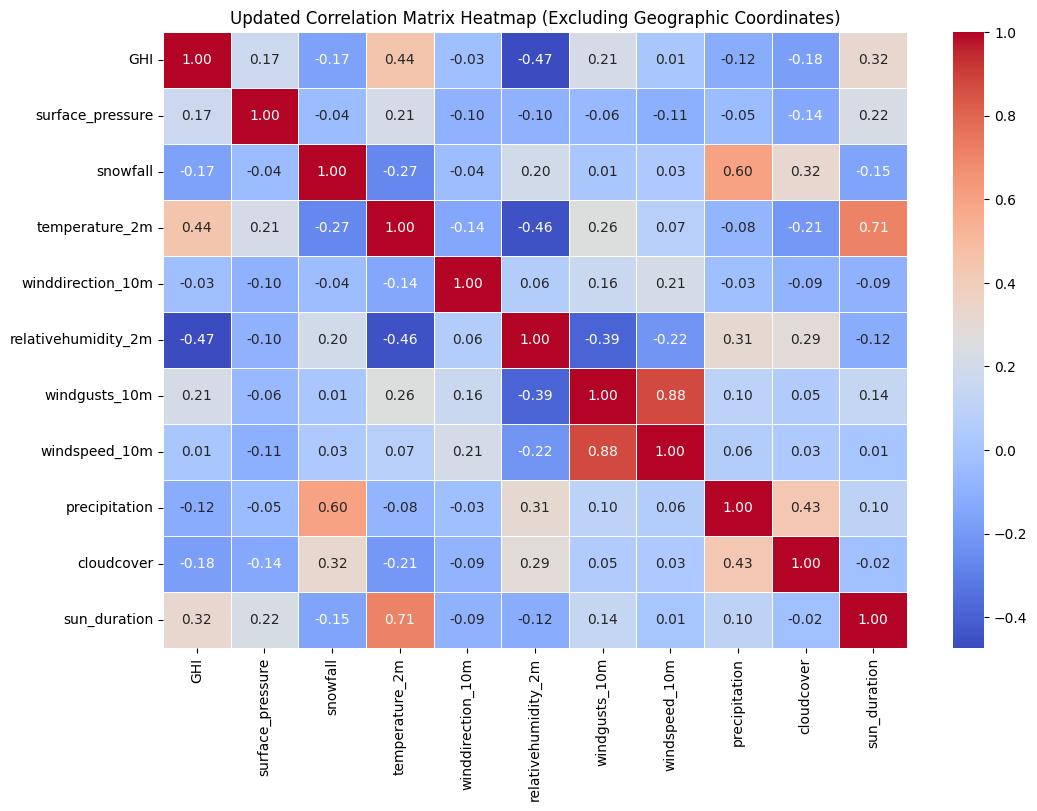

In [242]:
correlation_matrix = df_clean.corr(method='spearman')


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Updated Correlation Matrix Heatmap (Excluding Geographic Coordinates)')
plt.show()

# Data visualization


### * Below I resample over month, and show the sum and mean of features. 

/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_18150/4202318031.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sum = df_clean.resample('M').sum().plot(title='resampled over month for sum')


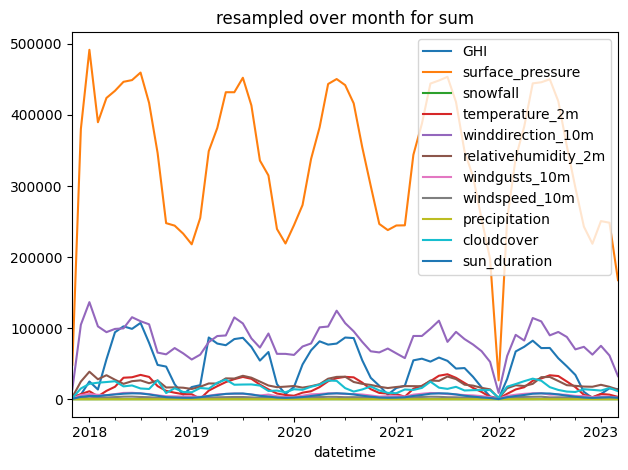

/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_18150/4202318031.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_clean.resample('M').mean().plot(title='resampled over month for mean')


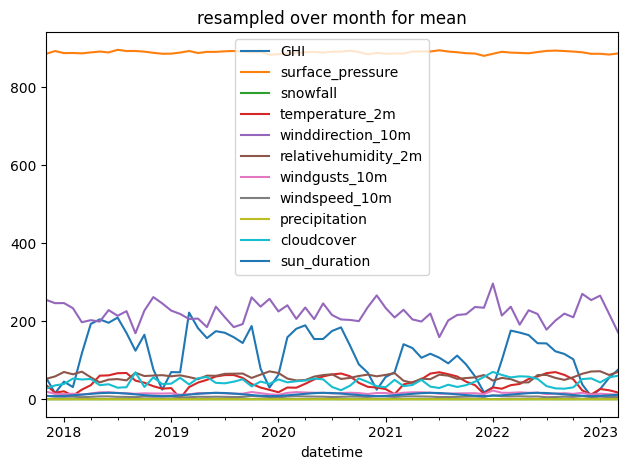

In [228]:
monthly_sum = df_clean.resample('M').sum().plot(title='resampled over month for sum') 
plt.tight_layout()
plt.show()  

df_clean.resample('M').mean().plot(title='resampled over month for mean') 
plt.tight_layout()
plt.show()

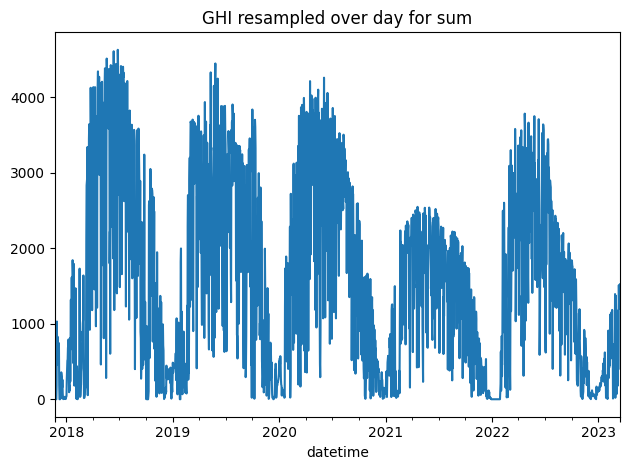

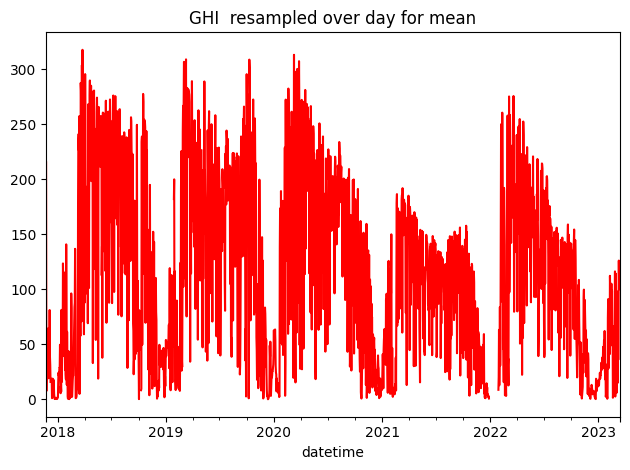

In [ ]:
df_clean.GHI.resample('D').sum().plot(title='GHI resampled over day for sum') 

plt.tight_layout()
plt.show()   

df_clean.GHI.resample('D').mean().plot(title='GHI  resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

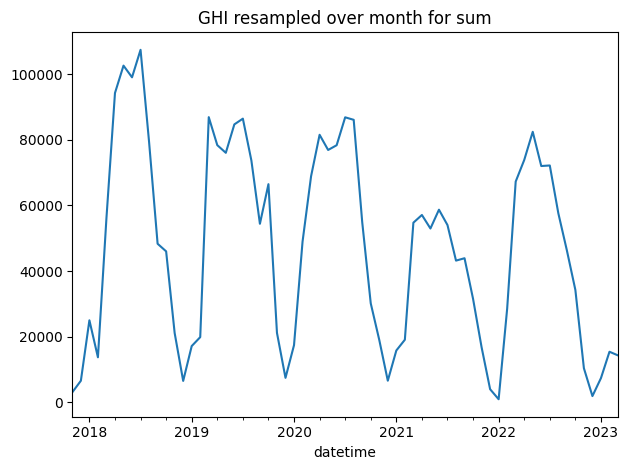

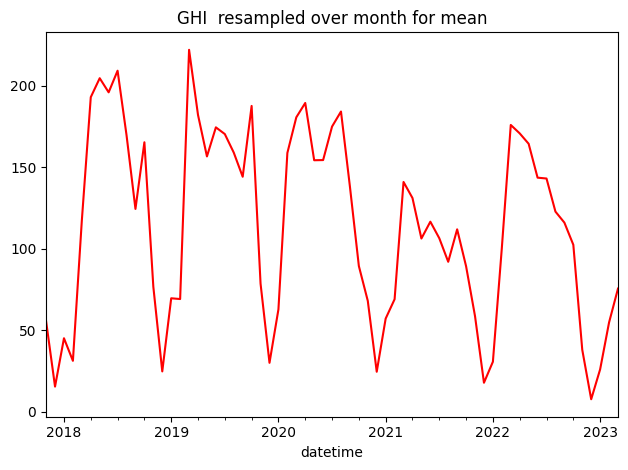

In [ ]:
df_clean.GHI.resample('M').sum().plot(title='GHI resampled over month for sum') 

plt.tight_layout()
plt.show()   

df_clean.GHI.resample('M').mean().plot(title='GHI  resampled over month for mean', color='red') 
plt.tight_layout()
plt.show()

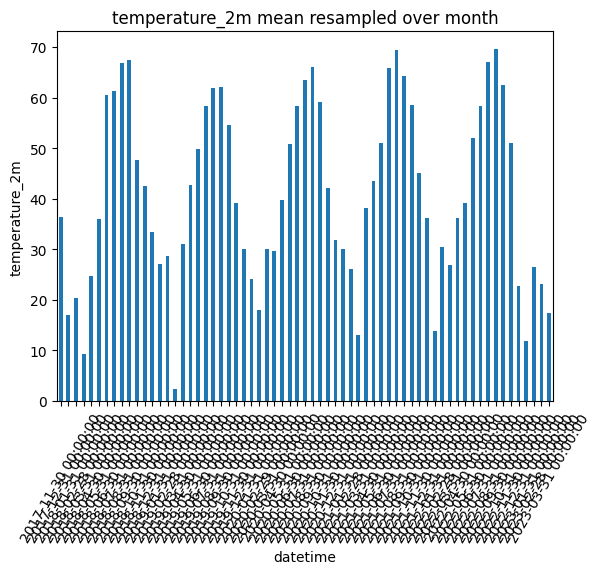

In [234]:

df_clean.temperature_2m.resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('temperature_2m')
plt.title('temperature_2m mean resampled over month')
plt.show()

## Mean of 'temperature_2m' resampled over quarter

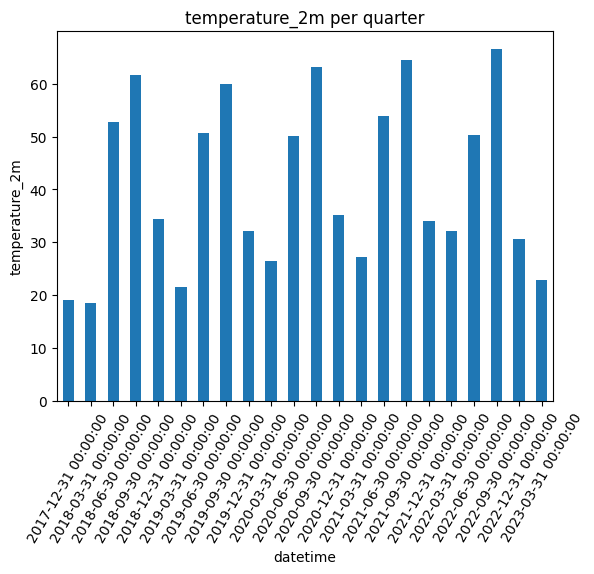

In [236]:
df_clean.temperature_2m.resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('temperature_2m')
plt.title('temperature_2m per quarter')
plt.show()

### * It is very important to note from above two plots that resampling over larger time inteval, will diminish the periodicity of system as we expect. This is important for machine learning feature engineering. 

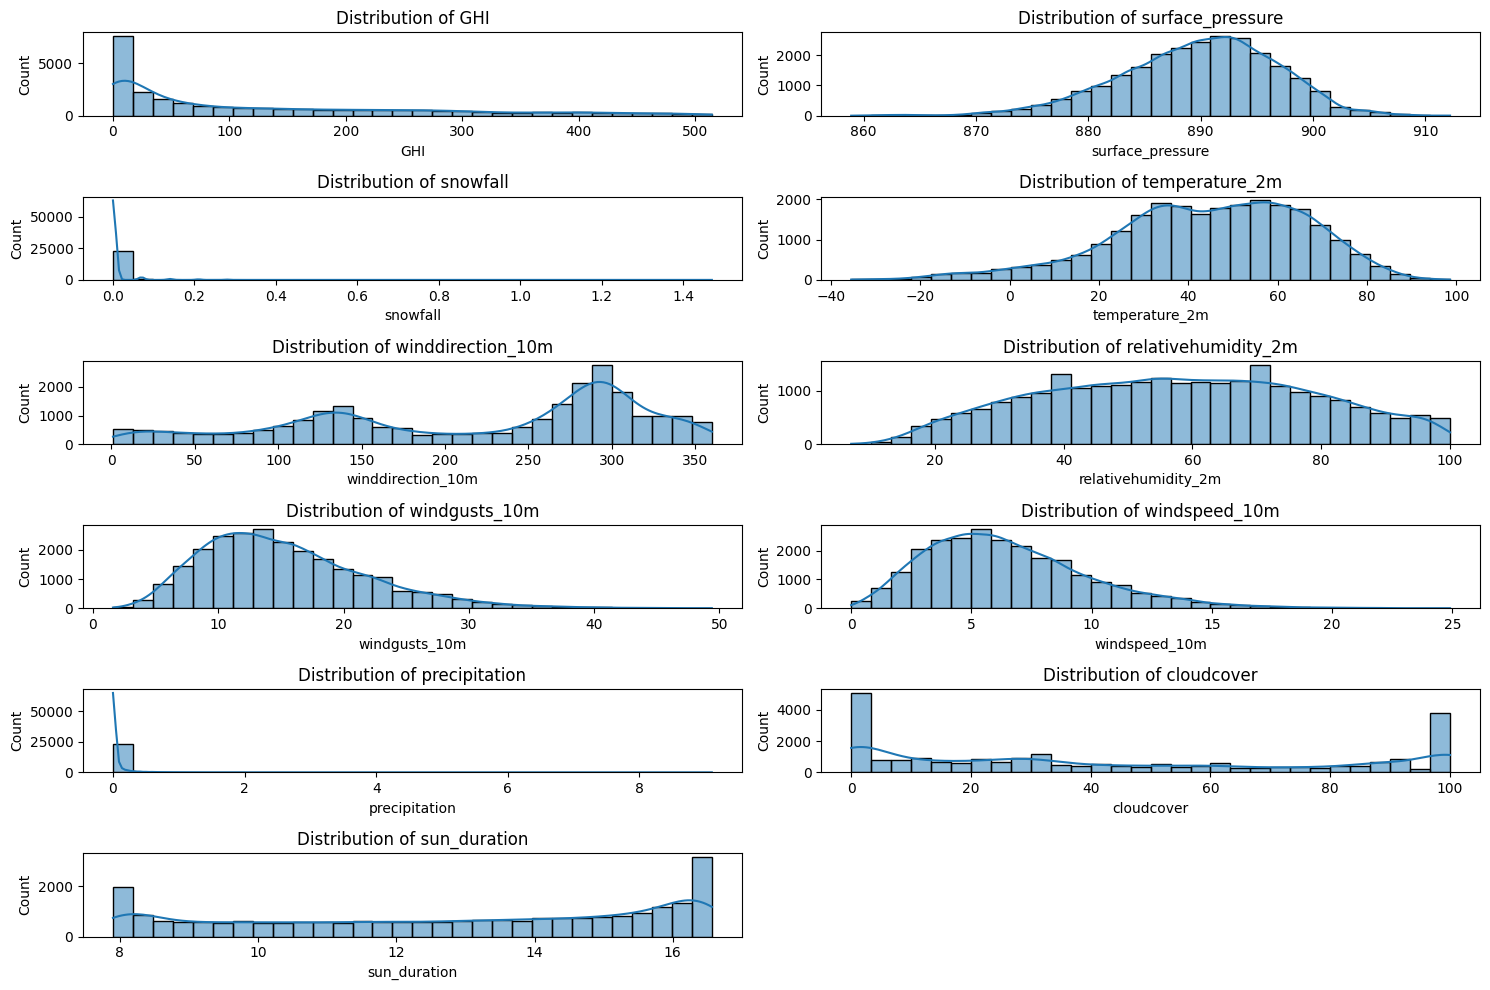

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))


num_columns = len(df_clean.select_dtypes(include=['float64', 'int64']).columns)


rows = (num_columns // 2) + (num_columns % 2)  
cols = 2  


i = 1
for column in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    plt.subplot(rows, cols, i)  
    sns.histplot(df_clean[column], kde=True, bins=30)  
    plt.title(f'Distribution of {column}')
    i += 1

plt.tight_layout()  
plt.show()




Distribution of GHI (Global Horizontal Irradiance)
The distribution of GHI exhibits a right-skewed long tail, indicating that most of the time, radiation levels are low, while exceptionally high radiation levels occur rarely. This right-skewed distribution is typical under conditions of low solar intensity, with occasional significant increases during ideal weather conditions.


Snowfall
Snowfall also shows a highly right-skewed distribution. In most cases, the snowfall amount is near zero, but there are occasional instances of extreme snowfall. This right-skewed characteristic is typical, as snowfall is absent most of the time, only occurring in significant amounts under specific weather conditions.



Surface Pressure
Surface pressure approximates a normal distribution, with most values concentrated between 890 hPa and 900 hPa. This distribution suggests that the data predominantly falls within a standard pressure range, likely influenced by the geographical location and weather conditions.



Temperature at 2m
The temperature at 2 meters follows a normal distribution, with most values ranging between 30°C and 60°C. This indicates that temperature variations are relatively standard, with most of the time falling within a comfortable temperature range.



Relative Humidity at 2m
The relative humidity at 2 meters exhibits a degree of symmetry, concentrated between 40% and 60%. This suggests that relative humidity is typically moderate, with extreme values being rare.




Wind Direction at 10m
Wind direction at 10 meters appears uniformly distributed, with values spanning from 0 to 360 degrees without any apparent concentration. This indicates that wind direction varies evenly, likely influenced by geographical and climatic conditions.




Wind Gusts at 10m
The distribution of wind gusts is relatively concentrated, with most values falling between 10 km/h and 30 km/h. This suggests that wind speeds are generally low, with stronger gusts being infrequent, indicating stable wind conditions.



Wind Speed at 10m
Wind speed at 10 meters shows a relatively flat distribution, with most values concentrated between 0 and 10 km/h. This implies that wind speeds are generally low, with higher speeds occurring infrequently.



Precipitation
Precipitation shows a highly right-skewed distribution, with the vast majority of instances recording zero precipitation, while a few cases exhibit significant amounts. This aligns with typical precipitation patterns, where most days are dry, but occasional heavy rainfall occurs.



Cloud Cover
Most cloud cover values are concentrated at lower levels (0% to 20%), with occasional instances of higher cloud cover (approaching 100%). This distribution suggests that skies are generally clear, with intermittent periods of overcast or cloudy conditions.



Sun Duration
Sun duration displays a distinctly right-skewed distribution, with most values ranging between 8 and 16 hours. This indicates that sunlight is generally abundant, with shorter durations occurring occasionally, likely influenced by seasonal and geographical factors.


/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_18150/2233998649.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_resample = df_clean.resample('M').mean()


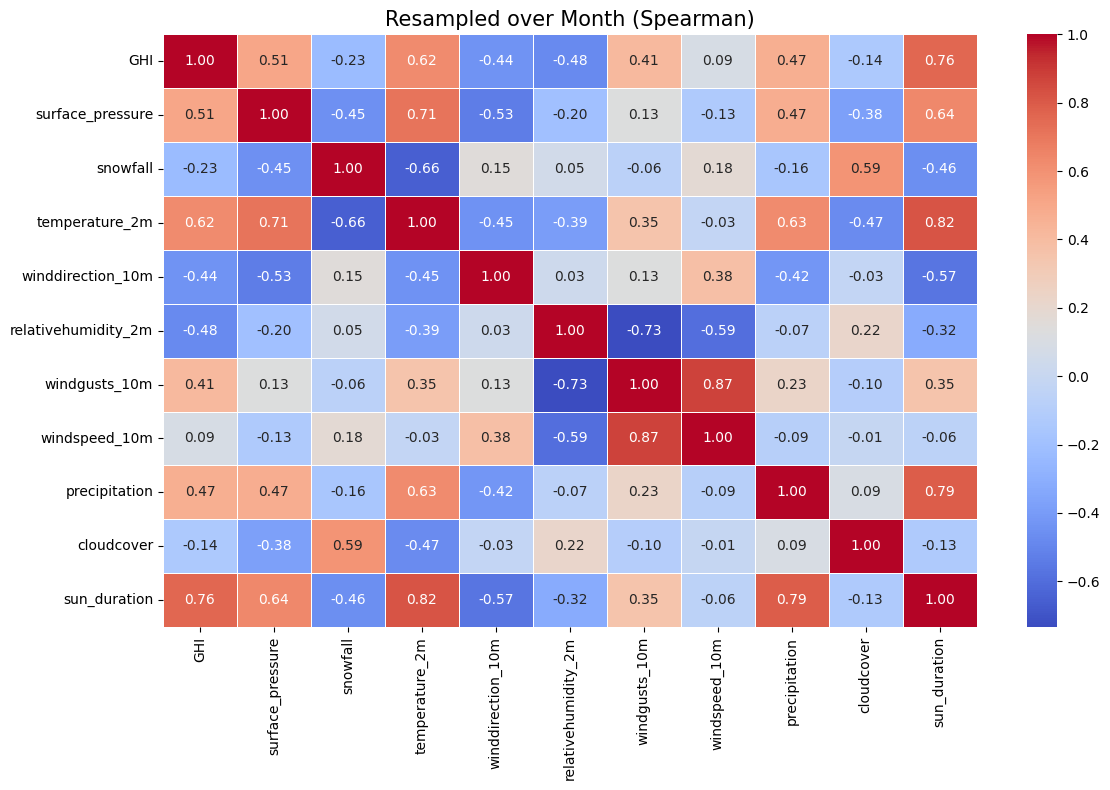

/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_18150/2233998649.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  annual_resample = df_clean.resample('A').mean()


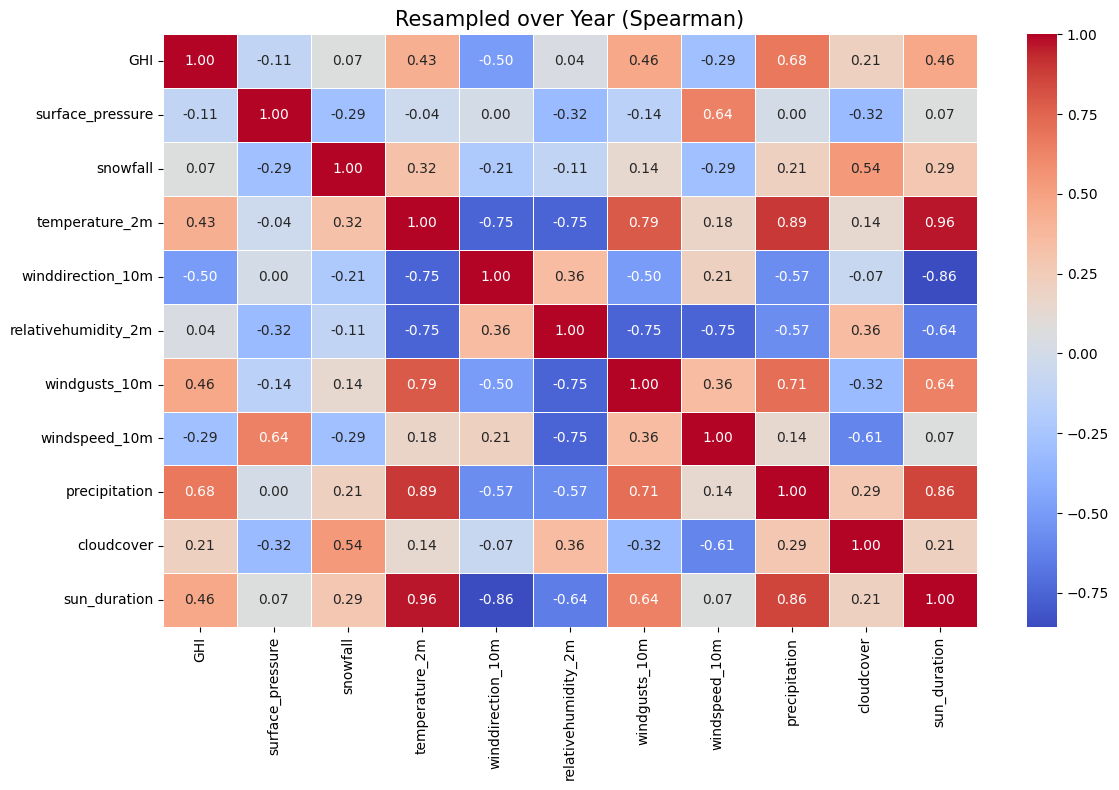

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Resampling: averaging by month and calculating monthly correlation matrices
monthly_resample = df_clean.resample('M').mean()
monthly_corr = monthly_resample.corr(method='spearman') 


plt.figure(figsize=(12, 8))
sns.heatmap(monthly_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Resampled over Month (Spearman)', size=15)
plt.tight_layout()  
plt.show()

# Resampling: averaging by year and calculating the correlation matrix for each year
annual_resample = df_clean.resample('A').mean()
annual_corr = annual_resample.corr(method='spearman')  


plt.figure(figsize=(12, 8))
sns.heatmap(annual_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Resampled over Year (Spearman)', size=15)
plt.tight_layout()  
plt.show()




### * It is seen from above that with resampling techniques one can change the correlations among features. This is important for feature  engineering.

# Machine-Leaning: LSTM Data Preparation and feature engineering

### * I will apply recurrent nueral network (LSTM) which is best suited for time-seriers and sequential problem. This approach is the best if we have large data.  

### * I will frame the supervised learning problem as predicting the GHI at the current time (t) given the GHI measurement and other features at the prior time step.

In [ ]:
## resampling of data over hour
df_resample = df_clean.resample('h').mean() 
df_resample.shape


/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_18150/489908666.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resample = df_clean.resample('h').mean()


(46571, 11)

In [247]:
df_resample

,GHI,surface_pressure,snowfall,temperature_2m,winddirection_10m,relativehumidity_2m,windgusts_10m,windspeed_10m,precipitation,cloudcover,sun_duration
datetime,,,,,,,,,,,
2017-11-22 09:00:00,20.961,884.2,0.0,40.8,274.0,71.0,19.9,6.5,0.0,0.0,8.583333
2017-11-22 10:00:00,50.230,883.8,0.0,31.9,201.0,89.0,11.9,3.1,0.0,0.0,8.583333
2017-11-22 11:00:00,236.600,884.3,0.0,33.7,173.0,87.0,8.9,3.6,0.0,3.0,8.583333
2017-11-22 12:00:00,399.535,884.3,0.0,36.5,124.0,84.0,8.3,4.0,0.0,2.0,8.583333
2017-11-22 13:00:00,398.994,884.4,0.0,38.3,118.0,80.0,7.6,4.3,0.0,2.0,8.583333
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-16 15:00:00,182.748,898.5,0.0,36.2,315.0,40.0,8.1,3.5,0.0,0.0,11.916667
2023-03-16 16:00:00,152.644,898.1,0.0,37.2,308.0,37.0,8.9,4.0,0.0,7.0,11.916667
2023-03-16 17:00:00,100.145,897.8,0.0,36.7,297.0,41.0,8.9,3.5,0.0,0.0,11.916667


In [260]:

def series_to_supervised(data, n_in=3, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

## * Note: I scale all features in range of [0,1]. 

In [310]:
## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled,n_in=1,n_out=1)

reframed.drop(reframed.columns[[12,13,14,15,16,17,18,19,20,21]], axis=1, inplace=True)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.040742   0.474672        0.0   0.568978   0.760446   0.688172   
2   0.097634   0.467167        0.0   0.502610   0.557103   0.881720   
3   0.459897   0.476548        0.0   0.516033   0.479109   0.860215   
4   0.776607   0.476548        0.0   0.536913   0.342618   0.827957   
5   0.775555   0.478424        0.0   0.550336   0.325905   0.784946   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)   var1(t)  
1   0.382845   0.261044        0.0        0.00    0.078846  0.097634  
2   0.215481   0.124498        0.0        0.00    0.078846  0.459897  
3   0.152720   0.144578        0.0        0.03    0.078846  0.776607  
4   0.140167   0.160643        0.0        0.02    0.078846  0.775555  
5   0.125523   0.172691        0.0        0.02    0.078846  0.359633  


### * Above I showed 11 input variables (input series) and the 1 output variable for 'GHI'

# Splitting the rest of data to train and validation sets

In [338]:
# split into train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0],1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(8760, 1, 11) (8760,) (13900, 1, 11) (13900,)


# Model architecture

### 1)  LSTM with 100 neurons in the first visible layer 
### 3) dropout 20%
### 4) 1 neuron in the output layer for predicting Global_active_power. 
### 5) The input shape will be 1 time step with 7 features.

### 6) I use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.
### 7) The model will be fit for 20 training epochs with a batch size of 70.



In [330]:
print("Test_X shape:", test_X.shape)
print("Test_y shape:", test_y.shape)


Test_X shape: (13900, 1, 11)
Test_y shape: (13900,)


Epoch 1/8
126/126 - 3s - loss: 0.0594 - val_loss: 0.0237 - 3s/epoch - 24ms/step
Epoch 2/8
126/126 - 2s - loss: 0.0273 - val_loss: 0.0152 - 2s/epoch - 13ms/step
Epoch 3/8
126/126 - 1s - loss: 0.0203 - val_loss: 0.0136 - 1s/epoch - 10ms/step
Epoch 4/8
126/126 - 1s - loss: 0.0191 - val_loss: 0.0132 - 1s/epoch - 9ms/step
Epoch 5/8
126/126 - 1s - loss: 0.0187 - val_loss: 0.0131 - 1s/epoch - 9ms/step
Epoch 6/8
126/126 - 1s - loss: 0.0185 - val_loss: 0.0130 - 1s/epoch - 10ms/step
Epoch 7/8
126/126 - 1s - loss: 0.0183 - val_loss: 0.0129 - 1s/epoch - 10ms/step
Epoch 8/8
126/126 - 1s - loss: 0.0182 - val_loss: 0.0129 - 1s/epoch - 9ms/step


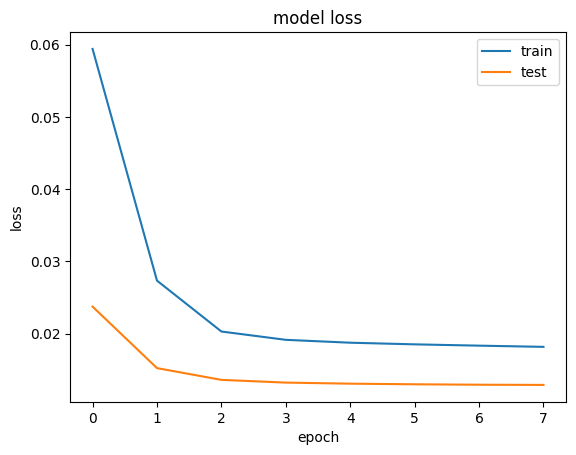

435/435 [==============================] - 1s 2ms/step
MSE: 3411.761
Test RMSE: 58.410
Test MAE: 43.934
Test MAPE: 94.180
Test R² Score: 0.786


In [339]:

model = Sequential()
model.add(LSTM(80, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
# fit network
history = model.fit(train_X, train_y, epochs=8, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 11))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -10:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -10:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = mean_squared_error(inv_y, inv_yhat)
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
mae = mean_absolute_error(inv_y, inv_yhat)
mape = mean_absolute_percentage_error(inv_y, inv_yhat)
r2 = r2_score(inv_y, inv_yhat)

# Print all evaluation metrics
print(f'MSE: {mse:.3f}')
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)
print('Test R² Score: %.3f' % r2)

Epoch 1/10
126/126 - 6s - loss: 0.0610 - val_loss: 0.0223 - 6s/epoch - 51ms/step
Epoch 2/10
126/126 - 3s - loss: 0.0249 - val_loss: 0.0155 - 3s/epoch - 21ms/step
Epoch 3/10
126/126 - 2s - loss: 0.0205 - val_loss: 0.0160 - 2s/epoch - 14ms/step
Epoch 4/10
126/126 - 2s - loss: 0.0199 - val_loss: 0.0166 - 2s/epoch - 14ms/step
Epoch 5/10
126/126 - 2s - loss: 0.0200 - val_loss: 0.0169 - 2s/epoch - 14ms/step


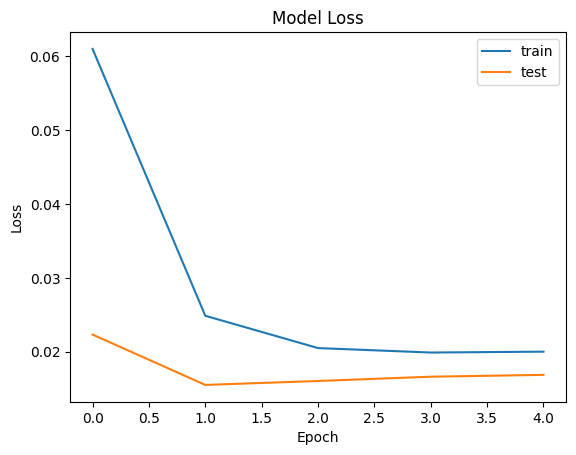

435/435 [==============================] - 2s 3ms/step
MSE: 4104.203
Test RMSE: 64.064
Test MAE: 50.184
Test MAPE: 140.969
Test R² Score: 0.742


In [ ]:
from keras.callbacks import EarlyStopping


model = Sequential()
model.add(LSTM(80, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(Dropout(0.2))  
model.add(LSTM(70))  
model.add(Dropout(0.3))  
model.add(Dense(1))  
model.compile(loss='mean_squared_error', optimizer='adam')


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(
    train_X, train_y,
    epochs=10,
    batch_size=70,
    validation_data=(test_X, test_y),
    verbose=2,
    shuffle=False,
    callbacks=[early_stopping]  
)


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 11))

# Inverse transform of predicted values
inv_yhat = np.concatenate((yhat, test_X[:, -10:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, 0]  

# Inverse transform of actual values
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -10:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, 0]  


mse = mean_squared_error(inv_y, inv_yhat)
rmse = np.sqrt(mse)
mae = mean_absolute_error(inv_y, inv_yhat)
mape = mean_absolute_percentage_error(inv_y, inv_yhat)
r2 = r2_score(inv_y, inv_yhat)


print(f'MSE: {mse:.3f}')
print(f'Test RMSE: {rmse:.3f}')
print(f'Test MAE: {mae:.3f}')
print(f'Test MAPE: {mape:.3f}')
print(f'Test R² Score: {r2:.3f}')


### Note that in order to improve the model, one has to adjust epochs and batch_size.
